     duration  waiting   kind
0       3.600       79   long
1       1.800       54  short
2       3.333       74   long
3       2.283       62  short
4       4.533       85   long
..        ...      ...    ...
267     4.117       81   long
268     2.150       46  short
269     4.417       90   long
270     1.817       46  short
271     4.467       74   long

[272 rows x 3 columns]


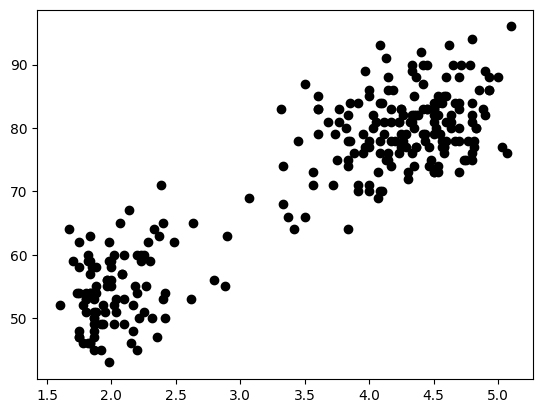

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

        
geyser=sns.load_dataset("geyser")
print (geyser)

fig,ax=plt.subplots()
for i in range(geyser.shape[0]):
    ax.scatter(geyser["duration"][i],geyser["waiting"][i],c="black")
plt.show()

In [2]:
mu_1=np.array([3,80])
mu_2=np.array([3.5,60])
sig_1=np.array(([1,0],[0,1]))
sig_2=np.array(([1,0],[0,1]))
phi_1=0.5
phi_2=0.5
w=np.zeros((geyser.shape[0],2))

def normprob(z,mu,sig):
    frac=1/((2*np.pi)**(4/2))*(np.linalg.det(sig)**(1/2))
    ex=np.exp((-1/2)*(np.dot(np.dot((z-mu),np.linalg.inv(sig)),(z-mu).T)))
    return frac*ex
    
def estep(w):
    for i in range (w.shape[0]):
        norm1=normprob((geyser["duration"][i],geyser["waiting"][i]),mu_1,sig_1)
        norm2=normprob((geyser["duration"][i],geyser["waiting"][i]),mu_2,sig_2)
        w[i][0]=norm1*phi_1/(norm1*phi_1+norm2*phi_2)
        w[i][1]=norm2*phi_2/(norm1*phi_1+norm2*phi_2)

def updatephi(w):
    newphi_1=0
    newphi_2=0
    for i in range (w.shape[0]):
        newphi_1+=w[i][0]
        newphi_2+=w[i][1]
    p1=newphi_1/w.shape[0]
    p2=newphi_2/w.shape[0]
    return (p1,p2)

def updatemu(w):
    num_1=np.zeros(2)
    num_2=np.zeros(2)
    denom_1=0
    denom_2=0
    for i in range (w.shape[0]):
        num_1+=w[i][0]*np.array([geyser["duration"][i],geyser["waiting"][i]])
        num_2+=w[i][1]*np.array([geyser["duration"][i],geyser["waiting"][i]])
        denom_1+=w[i][0]
        denom_2+=w[i][1]
    m1=num_1/denom_1
    m2=num_2/denom_2
    return (m1,m2)

def updatesig(w,m1,m2):
    num_1=np.zeros((2,2))
    num_2=np.zeros((2,2))
    denom_1=0
    denom_2=0
    for i in range (w.shape[0]):
        num_1+=w[i][0]*np.outer((np.array([geyser["duration"][i],geyser["waiting"][i]])-m1),(np.array([geyser["duration"][i],geyser["waiting"][i]])-m1).T)
        num_2+=w[i][1]*np.outer((np.array([geyser["duration"][i],geyser["waiting"][i]])-m2),(np.array([geyser["duration"][i],geyser["waiting"][i]])-m2).T)
        denom_1+=w[i][0]
        denom_2+=w[i][1]
    s1=num_1/denom_1
    s2=num_2/denom_2
    return (s1,s2)
    
def mstep(w,phi_1,phi_2,mu_1,mu_2,sig_1,sig_2):
    (phi_1,phi_2)=updatephi(w)
    (mu_1,mu_2)=updatemu(w)
    (sig_1,sig_2)=updatesig(w,mu_1,mu_2)
    return (w,phi_1,phi_2,mu_1,mu_2,sig_1,sig_2)
    
for i in range(10):
    estep(w)
    (w,phi_1,phi_2,mu_1,mu_2,sig_1,sig_2)=mstep(w,phi_1,phi_2,mu_1,mu_2,sig_1,sig_2)


(43.0, 96.0)

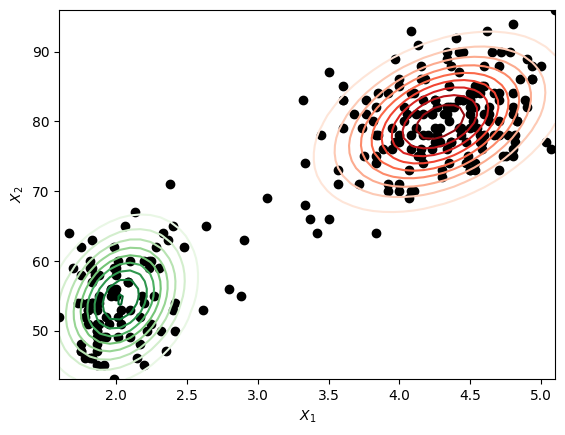

In [3]:
x1_min, x1_max = geyser["duration"].min(), geyser["duration"].max(),
x2_min, x2_max = geyser["waiting"].min(), geyser["waiting"].max(),

fig,ax = plt.subplots()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions on the grid
probs1=np.zeros(grid.shape[0])
probs2=np.zeros(grid.shape[0])

for i in range (grid.shape[0]):
    probs1[i] = normprob(grid[i],mu_1,sig_1)
    probs2[i] = normprob(grid[i],mu_2,sig_2)
    
probs1 = probs1.reshape(xx1.shape)
probs2 = probs2.reshape(xx1.shape)


# plot contours
plt.contour(xx1, xx2, probs1, levels=10, cmap=plt.cm.Reds, alpha=1)
plt.contour(xx1, xx2, probs2, levels=10, cmap=plt.cm.Greens, alpha=1)

for i in range(geyser.shape[0]):
    ax.scatter(geyser["duration"][i],geyser["waiting"][i],c="black")
    
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])